# Logistic Regression (Part 2: Predicting car purchase based on age and annual salary)
### About dataset

This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.

Columns\
User ID\
Gender\
Age\
Annual Salary\
Purchase Decision (No = 0; Yes = 1)

### Load packages and load dataset

In [1]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

%matplotlib inline
np.random.seed(42)

In [2]:
# import dataset

df = pd.read_csv('car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
# dataset info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [40]:
# count NA data
# there is no missing values in the data set

df.isnull().sum()

User ID              0
Gender               0
Age                  0
AnnualSalary         0
Purchased            0
model_probability    0
model_prediction     0
dtype: int64

### Descriptive statistics

In [6]:
# descriptive statistic

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,40.106,10.707073,18.0,32.00,40.0,48.00,63.0
AnnualSalary,1000.0,72689.000,34488.341867,15000.0,46375.00,72000.0,90000.00,152500.0
Purchased,1000.0,0.402,0.490547,0.0,0.00,0.0,1.00,1.0


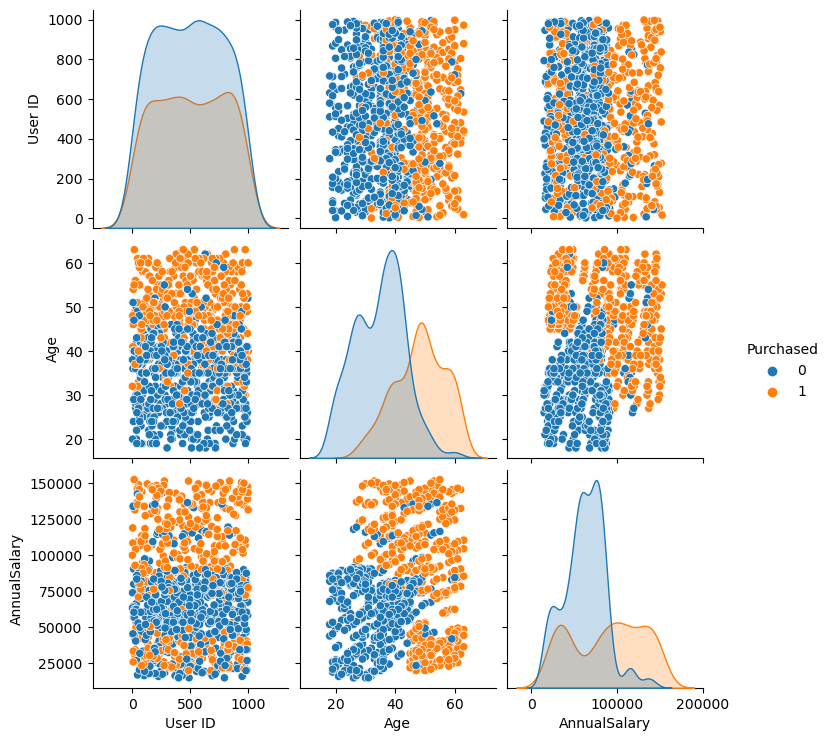

In [7]:
# seaborn pairplot based on purchased made (1) and purchased not made (0)
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data 
# will by shared across the y-axes across a single row and the x-axes across a single column.

# The diagonal plots are treated differently: a univariate distribution plot is drawn 
# to show the marginal distribution of the data in each column.

sns.pairplot(df, hue = 'Purchased')

### Correlation between independent and dependent variables

C:\Users\Zikri\AppData\Local\Temp\ipykernel_12860\1291828665.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')


<Axes: >

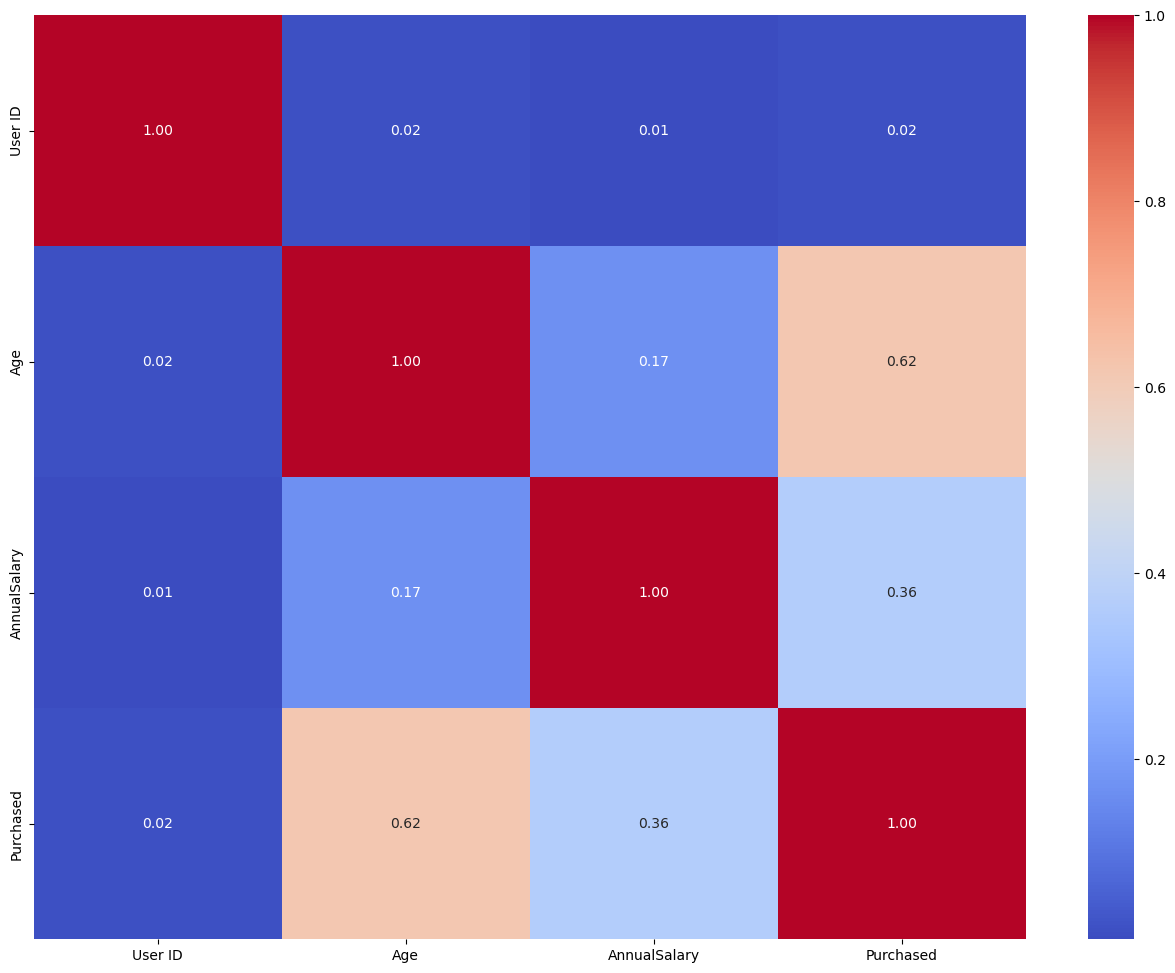

In [8]:
# seaborn heatmap

plt.figure(figsize = (16,12))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### Logistic regression model using statsmodels

0    598
1    402
Name: Purchased, dtype: int64


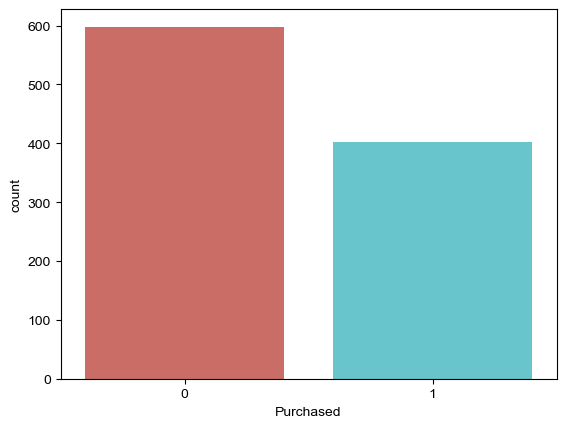

In [9]:
# count the purchases decision made
# count of car sold (1) and car unsold(0) based on customer data

print(df['Purchased'].value_counts())

sns.countplot(x='Purchased',data = df, palette='hls',order = df['Purchased'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [11]:
# logistic regression
x = df[['Age','AnnualSalary']]
y = df['Purchased']
X = sm.add_constant(x)

LogisticRegr = sm.Logit(y,X)
model = LogisticRegr.fit(method = 'newton')
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.372966
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Tue, 10 Oct 2023   Pseudo R-squ.:                  0.4465
Time:                        00:07:21   Log-Likelihood:                -372.97
converged:                       True   LL-Null:                       -673.81
Covariance Type:            nonrobust   LLR p-value:                2.205e-131
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.8442      0.769    -15.399      0.000     -13.352     -10.337
Age              0.2161

#### Odds ratio

In [12]:
# odds ratio is the natural e to the power of parameter
odds_ratio = np.exp(model.params)

# confidence level for odds ratio
confidence_interval = np.exp(model.conf_int())

# p-value for every parameter
pvalue = model.pvalues

# odds ratio, confidence interval, and p-values
table= confidence_interval
table['Odds Ratio'] = odds_ratio
table['p-value'] = round(pvalue,4)
table.columns = ['Lower 95%', 'Upper 95%','Odds Ratio','p-value']
print(table)

              Lower 95%  Upper 95%  Odds Ratio  p-value
const          0.000002   0.000032    0.000007      0.0
Age            1.205556   1.277983    1.241241      0.0
AnnualSalary   1.000027   1.000040    1.000033      0.0


#### plot regresssion line

In [24]:
# the probability of car purchase given the age = 30
# the age is hold constant at 30

annual_salary = np.arange(10000,210000,10000)
probability_based_salary = []


for i in annual_salary:
    probability = math.exp(model.params.const + model.params.AnnualSalary * i + model.params.Age * 30)/ ( 1 + math.exp(model.params.const + model.params.AnnualSalary * i + model.params.Age * 30))
    probability_based_salary.append(probability)

credit_table = pd.DataFrame({'Annual salary': annual_salary, 'Probability of car purchase': probability_based_salary})
credit_table

,Annual salary,Probability of car purchase
0,10000,0.006507
1,20000,0.009051
2,30000,0.012577
3,40000,0.017453
4,50000,0.024172
5,60000,0.033389
6,70000,0.045956
7,80000,0.062945
8,90000,0.085651
9,100000,0.115538


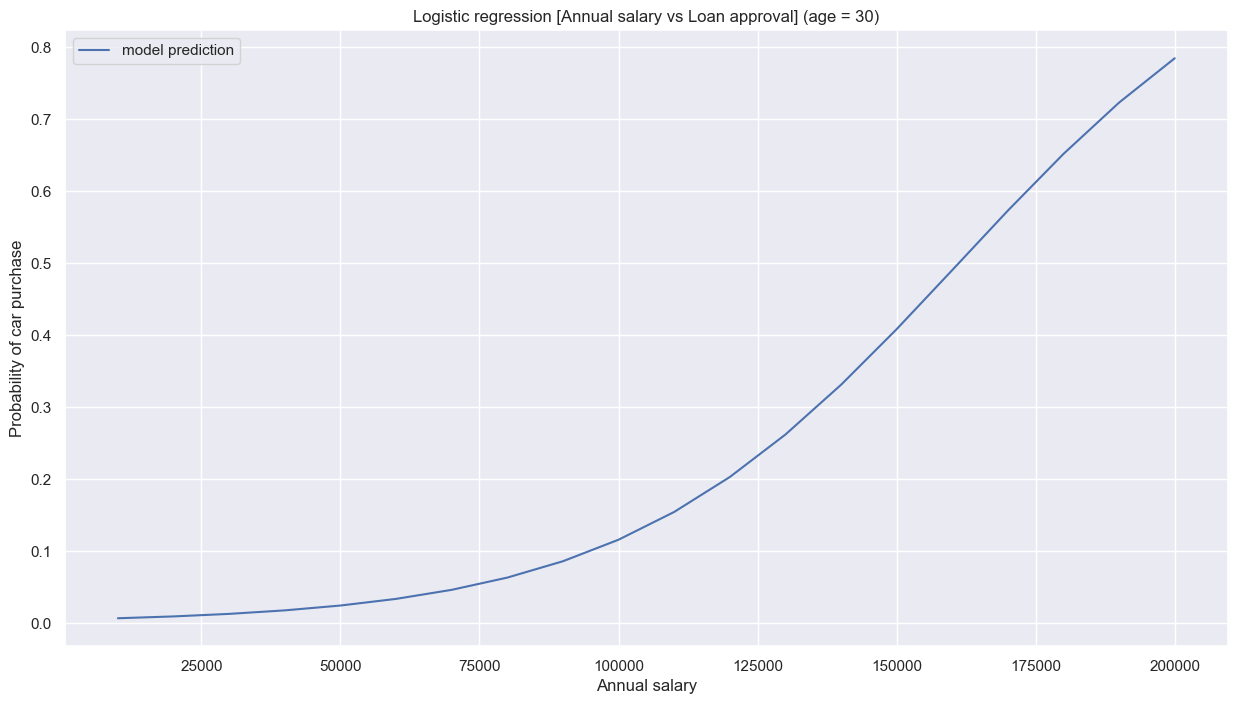

In [28]:
plt.figure(figsize = (15,8))
plt.plot(annual_salary,probability_based_salary, label = 'model prediction')
plt.ylabel('Probability of car purchase')
plt.xlabel('Annual salary')
plt.title('Logistic regression [Annual salary vs Loan approval] (age = 30)', size = 12)
plt.legend()
plt.show()

In [29]:
# the probability of car purchase given the annual salary = 100000
# the annual salary is hold constant at 10000

age = np.arange(18,63,3)
probability_based_age = []


for i in age:
    probability = math.exp(model.params.const + model.params.AnnualSalary * 100000 + model.params.Age * i)/ ( 1 + math.exp(model.params.const + model.params.AnnualSalary * 100000 + model.params.Age * i))
    probability_based_age.append(probability)

credit_table = pd.DataFrame({'Age': age, 'Probability of car purchase': probability_based_age})
credit_table

,Age,Probability of car purchase
0,18,0.009673
1,21,0.018336
2,24,0.034488
3,27,0.063941
4,30,0.115538
5,33,0.199880
6,36,0.323287
7,39,0.477422
8,42,0.635981
9,45,0.769643


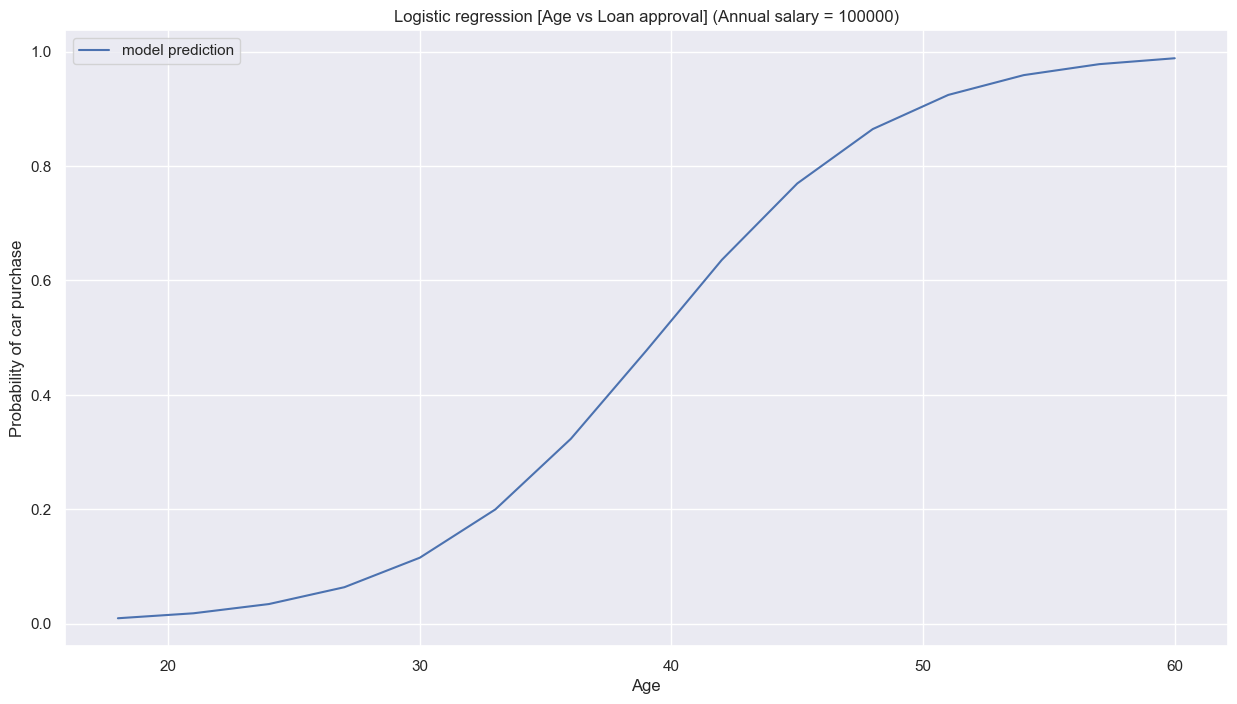

In [30]:
plt.figure(figsize = (15,8))
plt.plot(age,probability_based_age, label = 'model prediction')
plt.ylabel('Probability of car purchase')
plt.xlabel('Age')
plt.title('Logistic regression [Age vs Loan approval] (Annual salary = 100000)', size = 12)
plt.legend()
plt.show()

#### model accuracy and confusion matrix

In [37]:
df['model_probability'] = model.predict()
predict = []
for i in df['model_probability']:
    if i >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
df['model_prediction'] = predict

In [38]:
# dataframe head
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased,model_probability,model_prediction
0,385,Male,35,20000,0,0.026206,0
1,681,Male,40,43500,0,0.147650,0
2,353,Male,49,74000,0,0.769612,1
3,895,Male,40,107500,1,0.592703,1
4,661,Male,25,79000,0,0.021578,0


Text(0.5, 1.0, 'Accuracy Score: 0.828')

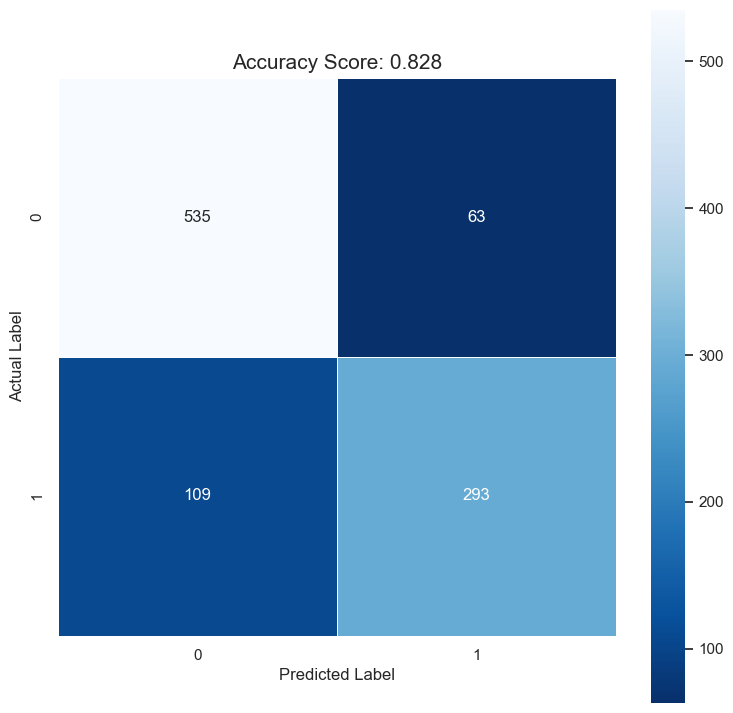

In [39]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm = metrics.confusion_matrix(df['Purchased'], df['model_prediction'])
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidth = 0.5, square = True, cmap = "Blues_r") 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(df['Purchased'], df['model_prediction']))
plt.title(all_sample_title, size = 15)